Astrolab 2020

# Task 10. The Hubble-Law and the expansion of the Universe

## Lab Tasks I

1. In the Hertzsprung-Russell Diagram, RR Lyrae is at the horizontal branch, while $\delta$ Cepheid stars are on or near the main sequence at the lower end of the instability strip.

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/HR-diag-instability-strip.svg/800px-HR-diag-instability-strip.svg.png?1601281142161>)

2. P-L relation for $\delta$ Cepheid stars: a power relation. $log{L} = k\cdot log{P} => L = P^k$ 
    
    log funciton of P-M_V relation:    $ M_V = -2.760 ( \log P - 1)-4.160$

3. The observed wavelength of Ly$\alpha$  for a quasar with redshift z = 6.4 can be calculated by the definition of z

    $\lambda_e = 1215.67 A$, $\lambda_o = (1+z)\lambda_e=8995.96 A$

4. The imaging survey of quasars go beyond z = 6, while the spectra(?) survey z = 5.

    ULAS J1342+0928 with 𝑧=7.54 (https://arxiv.org/abs/1712.01860)

5. Invariance under rotation. (the same in all direction).

    CMB. 

6. In large spatial scale one can say it is homogeneous, in small spatial scale (<~ several hundred Mpcs) it has structure.

## Lab Tasks II

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from astropy.io import ascii

tbl1 = ascii.read('Cosmology_tab1.txt')
del tbl1['V']
tbl1.rename_columns(['Julian','date','[mag]'],['Date','V','errV'])

The period of the Cepheid is around 100 Julian days


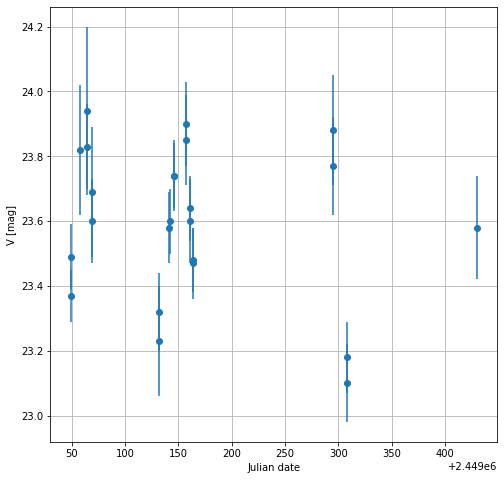

In [95]:
plt.figure(figsize = (8, 8))
plt.errorbar(tbl1["Date"], tbl1["V"], yerr = tbl1["errV"], fmt = "o")
plt.xlabel("Julian date")
plt.ylabel("V [mag]       ")
plt.grid()
print("The period of the Cepheid is around 100 Julian days")

In [93]:
P = 100
M_V = -2.760*(np.log10(P)-1.0)-4.160
DM = (np.mean(tbl1["V"])-M_V)
D = 10**(1+0.2*DM)
print("The distance modulus is %.2f mag."%(DM))
print("The distance is %.2f Mpc."%(D/1e6))

The distance modulus is 30.52 mag.
The distance is 12.71 Mpc.


In [64]:
tbl2 = ascii.read('Cosmology_tab2.txt',data_start=2)
#del tbl['V']
tbl2['name'] = [i+j for i,j in zip(tbl2['col1'],tbl2['col2'])]
tbl2.rename_columns([f'col{i}' for i in range(3,8)],['n','mu','errmu','v_Helio','v_CMB'])
del tbl2['col1']
del tbl2['col2']

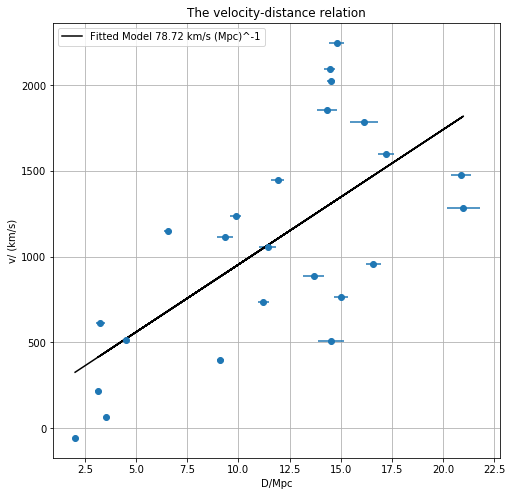

In [84]:
from astropy.modeling import models, fitting
from astropy.coordinates import Distance
import astropy.units as u

# define a model for a line
line_orig = models.Linear1D(slope=1.0, intercept=0.5)

x = Distance(distmod=tbl2['mu']).value
xerr = Distance(distmod=tbl2['mu']+tbl2['errmu']).value - Distance(distmod=tbl2['mu']).value
y = tbl2['v_CMB']

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter weights=1/yerr for yerr
fitted_line = fit(line_init, x,y)
H0 = fitted_line.parameters[0]* u.km/u.s/u.Mpc

# plot the model
fig,ax = plt.subplots(figsize = (8, 8))
ax.errorbar(x,y,xerr=xerr,fmt='o')
ax.plot(x, fitted_line(x), 'k-', label='Fitted Model %.2f km/s (Mpc)^-1'%(H0.value))
plt.xlabel('D/Mpc')
plt.ylabel('v/ (km/s)')
plt.legend()
plt.grid()
plt.title("The velocity-distance relation")
plt.show()

In [88]:
print("T0 = %.2f Gyr"%((1/H0).to(u.Gyr).value))

T0 = 12.42 Gyr


It is a measure for the age of the Universe, because the Universe expands quicker before (i.e. larger Hubble parameter), using the value from current day gives us an estimate of the lower limit of the age of the Universe. 